In [1]:
import sys
sys.path.append('../../')
import ex1dem.w1dem as w1

import numpy as np
import matplotlib.pyplot as plt

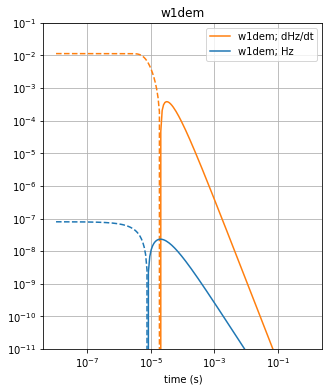

In [2]:
# 送信器の座標
tx = [0]
ty = [0]
tz = [0]

# 受信器の座標
rx = [100]
ry = [0]
rz = [0]

# 比抵抗値
resistivity = np.array([100])
# 層厚
thickness = np.array([]) # 単層のときは空白の配列でよい

# 時間領域（2~4までの3種類の計算方法があるが、ここでは3:dlag）
fdtd = 3

# 微分しない(1:yes, 0:no)覚えづらい
# dbdt = 1 #後で入力するのでここではコメントアウトしておく

# for VMD
dipole_mom=1.

# for time domein
# dlag：str
# dlagを用いる場合(fdtd=3の場合)の受信応答成分を入力。"e_x" or "e_y" or "e_z" or "h_x" or "h_y" or "h_z"
# fdtd=2の場合も、結果に影響しないが入力しておく。
dlag = 'h_z'; # 変数ではdlagとなっている。受信応答の成分
    #   1 : e_x , 2 : e_y, 3 : e_z
    #   4 : h_x , 5 : h_y, 6 : h_z

# グラフ描画用（これいらなくない？）
plot_number = 100

# 時間
times = np.logspace(-8, 0, plot_number) # fdtd:2の場合は10**-6　以上に設定する

# フィルタ名
hankel_filter = "key201" # empymodのデフォルトと揃える

# 微分しない(1:yes, 0:no)　→微分あり
dbdt = 0

# w1demのTdemを呼び出して、引数を与える(微分するから_dを追加する)
w1_tdem0 = w1.Tdem(rx, ry, rz, tx, ty, tz, resistivity, thickness, hankel_filter,
                  fdtd, dbdt, plot_number, dlag, times)

# 送信タイプを指定する。
w1_ans_d, times_dlag0 = w1_tdem0.vmd(dipole_mom) # w1_ansは電磁場応答6成分が辞書型、time_dlag0はtimeと異なるので出力しておく。
w1_dhz = w1_ans_d['h_z'] # 辞書型ansの'h_z'成分を取り出す

# 微分しない(1:yes, 0:no)　
dbdt = 1

# w1demのTdemを呼び出して、引数を与える
w1_tdem1 = w1.Tdem(rx, ry, rz, tx, ty, tz, resistivity, thickness, hankel_filter,
                  fdtd, dbdt, plot_number, dlag, times)

# 送信タイプを指定する。
w1_ans, times_dlag1 = w1_tdem1.vmd(dipole_mom) # w1_ansは電磁場応答6成分が辞書型、time_dlag1はtimeと異なるので出力しておく。
w1_hz = w1_ans['h_z'] # 辞書型ansの'h_z'成分を取り出す

plt.figure(figsize=(5, 6))

# 時間微分あり
plt.plot(times_dlag0, w1_dhz.real, 'C1-', label='w1dem; dHz/dt')
plt.plot(times_dlag0, -w1_dhz.real, 'C1--')

# 時間微分なし
plt.plot(times_dlag1, w1_hz.real, 'C0-', label='w1dem; Hz')
plt.plot(times_dlag1, -w1_hz.real, 'C0--')

# グラフの外観
plt.xscale('log')
plt.yscale('log')
# plt.xlim([1e-5, 1e3])
plt.yticks(10**np.arange(-11., 0))
plt.ylim([1e-11, 1e-1])
plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.title('w1dem')

plt.show()
